회사 로딩을 시작합니다.
..............................................................!
총 [3039]개 번호 수집 완료
마지막 회사 : [소프트센우]
회사 로딩이 완료되었습니다.
분석하실 회사번호를 입력해 주세요.
회사 번호를 모르시면 회사의 이름을 이용하여 검색해주세요.
검색할 단어나 회사번호를 입력해주세요 : 005930
[005930] - 삼성전자
'토론실', '주가', '뉴스', '뉴스 비교', '토론실 비교'
 이용하실 분석을 입력해주세요. : 토론실 비교
몇개의 회사를 조사하시겠습니까 : 20
삼성전자 : -1 
SK하이닉스 : -1 
LG화학 : -1 
삼성전자우 : -1 
삼성바이오로직스 : -1 
셀트리온 : 1 
NAVER : -1 
현대차 : -1 
삼성SDI : 1 
카카오 : -1 
기아차 : 1 
LG생활건강 : -1 
삼성물산 : 1 
현대모비스 : 1 
POSCO : 1 
SK텔레콤 : 1 
엔씨소프트 : -1 
KB금융 : -1 
한국전력 : 1 
SK이노베이션 : -1 


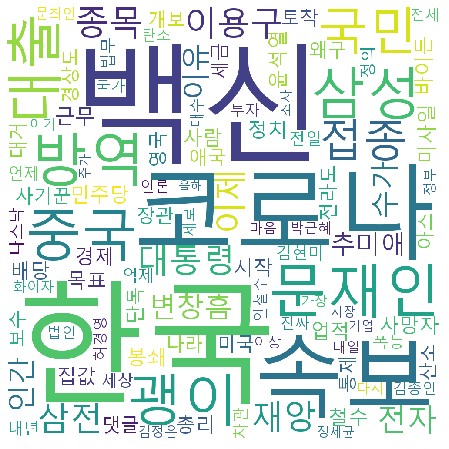

-1
하락종목


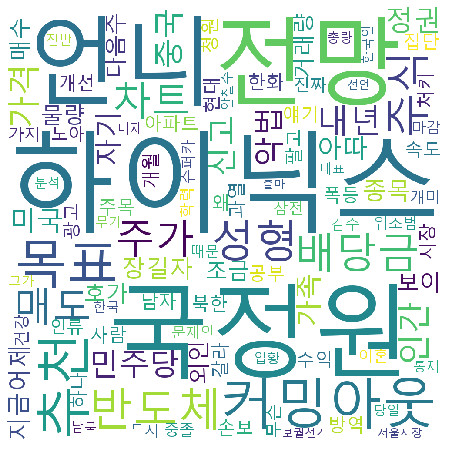

-1
하락종목


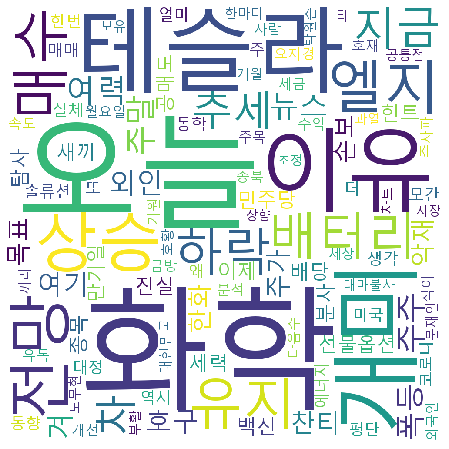

-1
하락종목


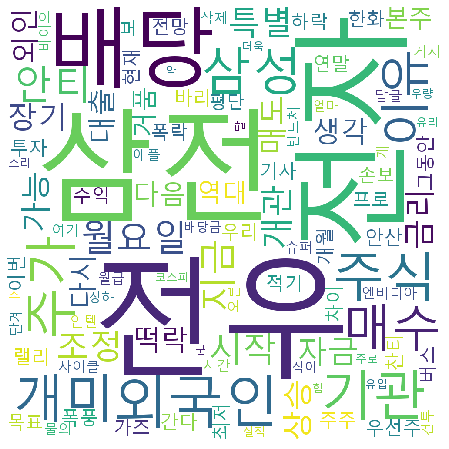

-1
하락종목


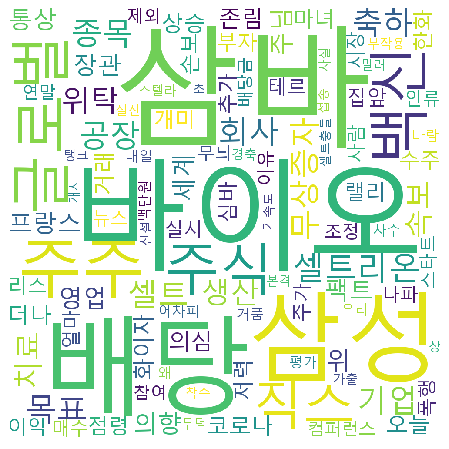

-1
하락종목


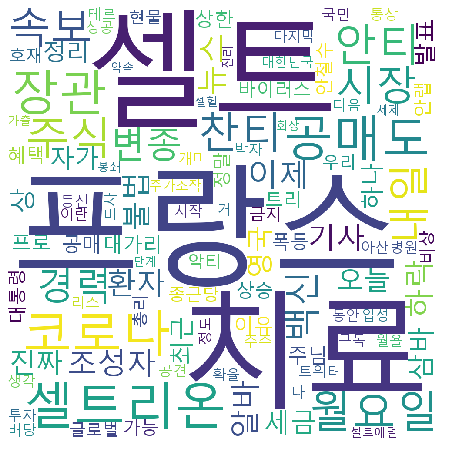

1
상승종목


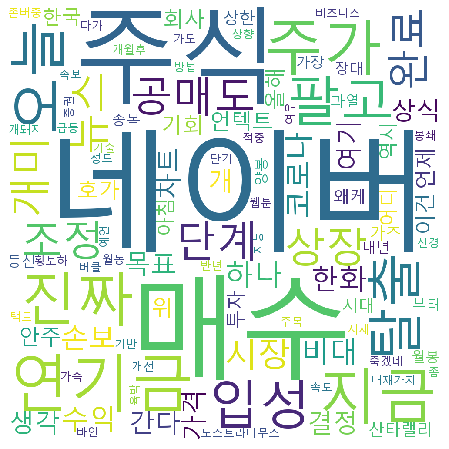

-1
하락종목


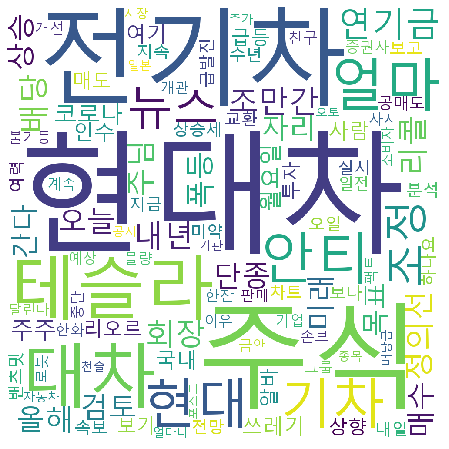

-1
하락종목


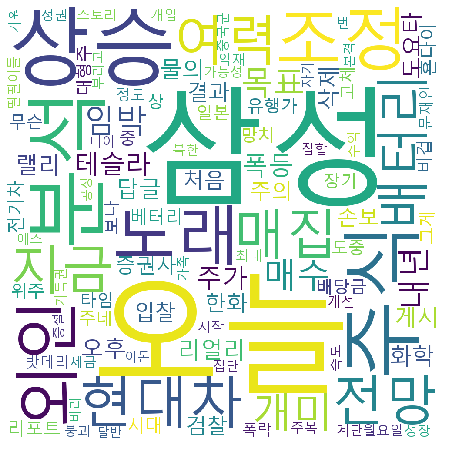

1
상승종목


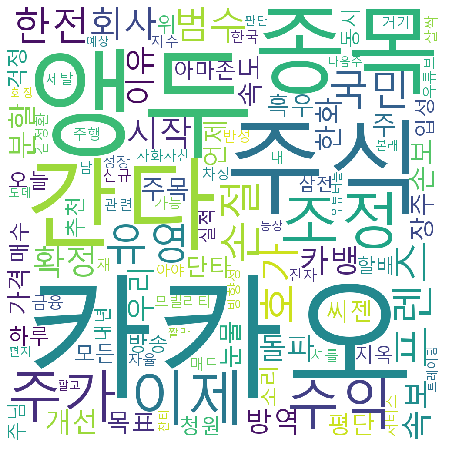

-1
하락종목


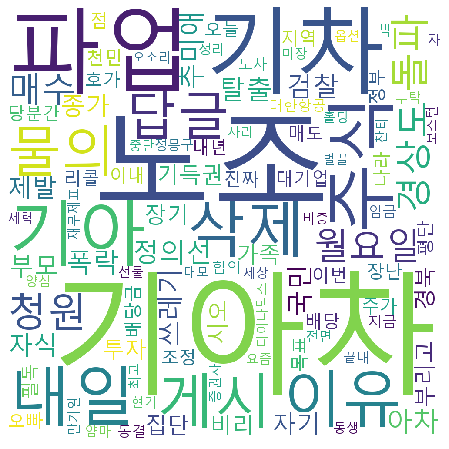

1
상승종목


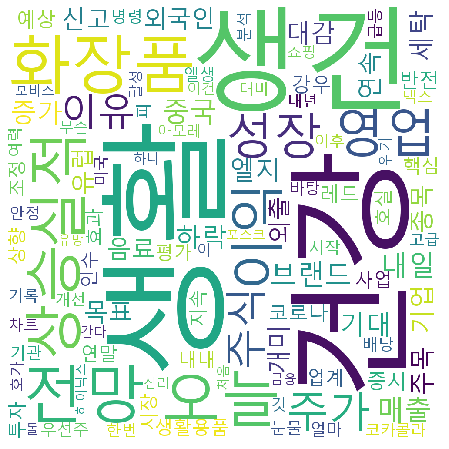

-1
하락종목


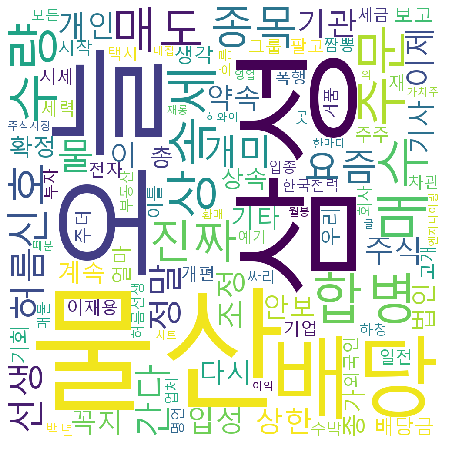

1
상승종목


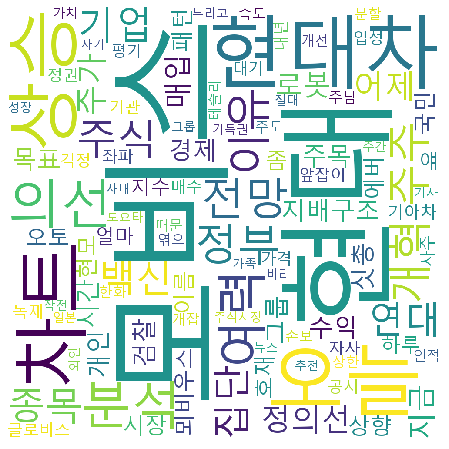

1
상승종목


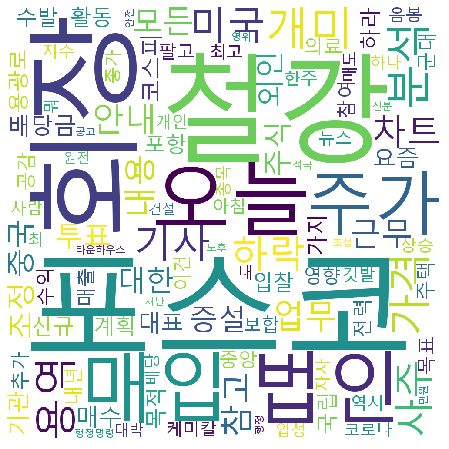

1
상승종목


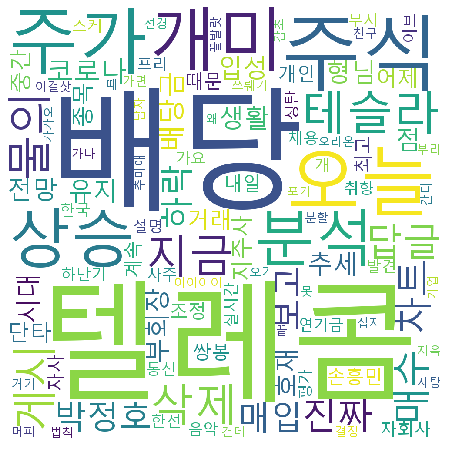

1
상승종목


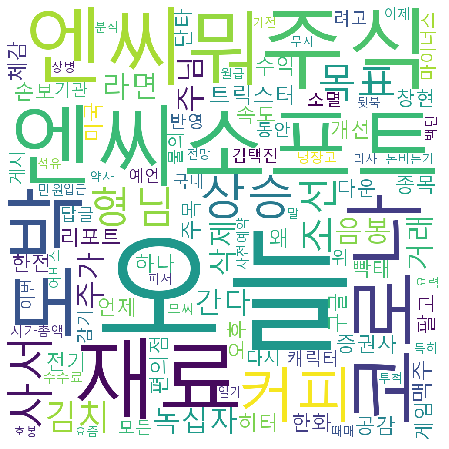

-1
하락종목


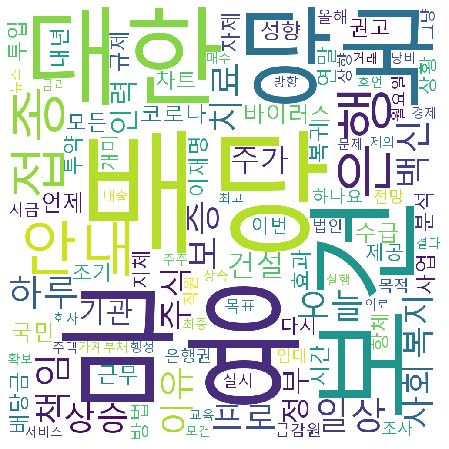

-1
하락종목


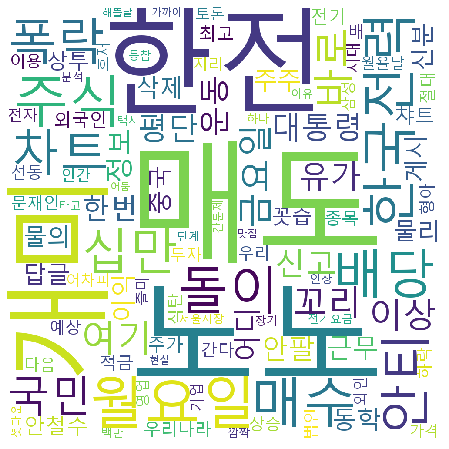

1
상승종목


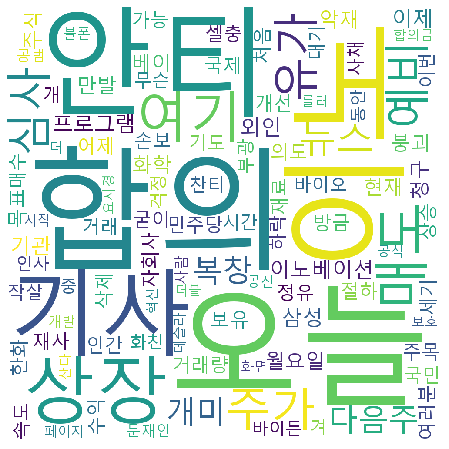

-1
하락종목
종료


In [7]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from itertools import count
import ssl
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from urllib.request import urlopen
import time
import requests
import nltk
from konlpy.tag import Okt; t = Okt()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('지원 안함')

plt.rcParams['axes.unicode_minus'] = False

address_list = []
name_list = []

enc = 'euc-kr'
address_append = address_list.append
name_append = name_list.append


def Load_list():
    sosok = 0
    page = 1
    count = 0
    precount = 0

    while True:
        url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=%s&page=%s' % (str(sosok), str(page))
        tbody = receive_tbody(url)
        
        if tbody == -1:
            return
        
        for store_tr in tbody.findAll('tr'):  
            re = store_tr.find('a', attrs = {'class':'tltle'})
            try:
                num = re['href'][-6:]1
                test = int(num[0])
                count = count + 1
                address_append(num)
                name_append(store_tr.a.string)

            except:
                test = 0
                
        if precount != count:
            page = page + 1
            precount = count
            print('.', end='')
            
        elif sosok != 1 :
            page = 1
            sosok = 1
            
        else:
            print('!')
            break
    
    print("총 [%d]개 번호 수집 완료" % count)
    print("마지막 회사 : [%s]" % name_list[-1])
    
def Search_Company(search): 
    search = search.strip()
    
    try:
        s_number = int(search)

        if len(search) == 6:
            for i, address in enumerate(address_list):
                if search == address:
                    print("[%s] - %s" % (address_list[i], name_list[i]))
                    return address_list[i]
                
        print("\n검색하신 회사번호는 없습니다.\n")
        
    except:
        print("")
        
    print("이름 검색으로 실시합니다.\n")    
    for i, name in enumerate(name_list):    
        if search in name:
            print("[%s] - %s" % (address_list[i], name_list[i]))
            
    print("\n검색을 종료합니다.\n")
    return -1

def Search_NewsPage(Company_number):
    enc = 'euc-kr'
    page = 1
    count = 0
    precount = 0
    total_list = []

    limit = int(input("찾을 갯수를 입력하시오 : "))
    kind = input("종류를 선택하십시오 (제목, 본문) : ")
    while True:
        url = 'https://finance.naver.com/item/news_news.nhn?code=%s&page=%s&sm=entity_id.basic' % (Company_number, str(page))
        tbody = receive_tbody(url)
        if tbody == -1:
            return

        for store_tr in tbody.findAll('tr'):  
            re = store_tr.find('a', attrs = {'class':'tit'})
            try:
                if kind == '제목':
                    total_list, suc =  Search_Newstitle(re['href'], total_list)
                elif kind == '본문':
                    total_list, suc =  Search_Newsmain(re['href'], total_list)
                if suc == True:
                    count = count + 1
                    if count >= limit:
                        print('%d Page - %d / %d \n' % (page, count, limit))
                        return total_list
            except:
                test = 0

        print('%d Page - %d / %d \n' % (page, count, limit))
        
        if precount + 1 != count:
            page = page + 1
            precount = count
            
        else:
            break

    return total_list
            
def Search_Newstitle(url, word_list):
    url = 'https://finance.naver.com' + url
    tbody = receive_tbody(url)
    word_append = word_list.append    
    
    if tbody == -1:
        return
    
    for store_tr in tbody.findAll('tr'):  
        re = store_tr.find('strong', attrs = {'class':'c p15'})

        try:
            if re.string not in word_list:
                word_append(re.string)
                print(re.string)
                suc = True
            else:
                suc = False
        except:
            test = 0
    
    return word_list, suc

def Search_Newsmain(url, word_list):
    url = 'https://finance.naver.com' + url
    tbody = receive_tbody(url)
    word_append = word_list.append
    suc = False
    for store_tr in tbody.findAll('tr'):  
        re = store_tr.find('div', attrs = {'class':'scr01'})

        try:        
            for st2 in re.strings:
                for st in st2.split('\n'):
                    st = st.strip()
                    if Check_spam(st) == 1 and st not in word_list:
                        word_append(st)
                        print(" = " + st)
                        suc = True
        except:
            test = 0
    print("**********************************")
    return word_list, suc

def Check_spam(string):
    spam_list = ['로 이동해 볼 수 있습니다.']
    try:
        if string == None:
            return -1
        if string[-2:] ==  '..':
            return -1
        if string[-1] == '.':
            for s in spam_list:
                if s in string: 
                    return -1
            return 1
    except: 
        return -1
    
def receive_tbody(url):
    enc = 'euc-kr'
    req = urllib.request.Request(url)

    try:
        ssl._create_default_https_context = ssl._create_unverified_context 
        response = urllib.request.urlopen(req)

        if response.getcode() == 200:
            try:
                rcv = response.read()
                ret = rcv.decode(enc)

            except UnicodeDecodeError:
                ret = rcv.decode(enc, 'replace')    

            tbody = BeautifulSoup(ret, 'html.parser')  
            return tbody
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return -1

def Viewword_News(data_list):
    from wordcloud import WordCloud, STOPWORDS
    from PIL import Image
    import nltk
    from konlpy.tag import Okt; t = Okt()
    import matplotlib.pyplot as plt
    
    present_text = ''
    for each_line in data_list:
        present_text = present_text + each_line + '\n'
        
    tokens_ko = t.nouns(present_text) 

    for i, v in enumerate(tokens_ko): 
        if len(v) < 2:        
            tokens_ko.pop(i)

    ko = nltk.Text(tokens_ko)
    data = ko.vocab().most_common(300)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          background_color='white',
                          width = 1000,
                          height = 1000,
                          max_words = 100,
                          max_font_size=300
                          ).generate_from_frequencies(dict(data))

    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  


    
def debateCrawling(numpage, Company_number):
    #print('Company_numger:', Company_number)
    b = []
    c = []
    e = []
    view = []
    maxIndex = 0
    for j in range(numpage+1): #토론실 페이지 얼만큼 할껀지
        url = 'https://finance.naver.com/item/board.nhn?code=%s&page=%s'%(Company_number, j)
        #print(url)
        headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}
        html = requests.get(url, headers = headers).text
        soup = BeautifulSoup(html, 'html.parser')
        #print(soup)
        a = soup.find_all('span', {'class':'tah p10 gray03'})
        d = soup.find_all('td', {'class':'title'})
        for i in d:
            c.append(i.find('a')['title'])
            e.append(i.find('a')['title'])
        for i in a:                
            b.append(i.string)

        for i in b:
            if i.startswith('2020.') == False:
                view.append(i)

        view = list(map(int, view))
        #print('view:', view)
        if not a:
            pass
        else:
            maxView = max(view) #조회수 가장 높은거
            #print('maxView:', maxView)
            #print('최대값의 인덱스값 :', view.index(maxView))
            maxIndex = view.index(maxView)
            #print('c:', c)
            #print('len(c):', len(c), ', len(view)', len(view))
            print(j, '페이지의 가장 높은 조회수 제목 :', c[maxIndex])
        view = []
        c = []
        b = []
        #print('e : ', e)
    return(e)    

def debateKeyword(data):    
    present_text = ''

    for each_line in data[:10000]:
        present_text = present_text + each_line + '\n'

    tokens_ko = t.nouns(present_text)
    #tokens_ko

    for i, v in enumerate(tokens_ko):
        if len(v) < 2:        
            tokens_ko.pop(i)

    ko = nltk.Text(tokens_ko)
    #print(ko.vocab().most_common(100))

    plt.figure(figsize=(15,6))
    ko.plot(50) 
    plt.show()

    data = ko.vocab().most_common(300)

    # for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          width = 1000,
                          height = 1000,
                          max_words = 100,
                          max_font_size=300
                          ).generate_from_frequencies(dict(data))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    wordcloud.to_file('wordcloud.png')

def Updown_debate():
    maxnum = 0
    while True:
        try:
            maxnum = int(input("몇개의 회사를 조사하시겠습니까 : "))
            break
        except:
            print('숫자를 입력해주세요')
    page = 1
    count = 0
    word_list = []
    slist = []
    today = datetime.date.today()  
    yesterday = today - datetime.timedelta(1) 
    
    while True:
        url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=%s' % str(page)
        tbody = receive_tbody(url)
        
        if tbody == -1:
            return
        
        for store_tr in tbody.findAll('tr'):  
            re = store_tr.find('span', attrs = {'class':'tah p11 nv01'})
            if re != None:
                slist.append(-1)
            else:
                re = store_tr.find('span', attrs = {'class':'tah p11 red01'})
                if re != None:
                    slist.append(1)
                else:
                    re = store_tr.find('span', attrs = {'class':'tah p11'})
                    if re != None:
                        slist.append(0)
            # 중복 클라스들이 있으니 하나씩만 

        if len(slist) >= maxnum:
            for i in range(0, maxnum):
                print("%s : %d " % (name_list[i], slist[i]))
            break

        else:
            page = page + 1
            
    Good_list = []
    Bad_list = []
    e = []
    f = []
     
    for k in range(0, maxnum):
        for l in range(10):#토론실 페이지 얼만큼 할껀지
            url = 'https://finance.naver.com/item/board.nhn?code=%s&page=%s'%(address_list[k], l)
            headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}
            html = requests.get(url, headers = headers).text
            soup = BeautifulSoup(html, 'html.parser')
            a = soup.find_all('span', {'class':'tah p10 gray03'})
            d = soup.find_all('td', {'class':'title'})
            for i in d:
                e.append(i.find('a')['title'])
        present_text = ''

        for each_line in e[:10000]:
            present_text = present_text + each_line + '\n'

        tokens_ko = t.nouns(present_text)

        for i, v in enumerate(tokens_ko):
            if len(v) < 2:        
                tokens_ko.pop(i)

        ko = nltk.Text(tokens_ko)
        e = ko.vocab().most_common(300)

        wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                              relative_scaling = 0.2,
                              #stopwords=STOPWORDS,
                              background_color='white',
                              width = 1000,
                              height = 1000,
                              max_words = 100,
                              max_font_size=300
                              ).generate_from_frequencies(dict(e))
        plt.figure(figsize=(16,8))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        print(slist[k])
        if slist[k] == 1:
            print('상승종목')
        elif slist[k] == -1:
            print('하락종목')
        else:
            print('보합종목')
        e = []

def get_request_url(url, enc='euc-kr'):
    
    req = urllib.request.Request(url)

    try:
        ssl._create_default_https_context = ssl._create_unverified_context    #접속보안 허용
        
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            try:
                rcv = response.read()
                ret = rcv.decode(enc)
            except UnicodeDecodeError:
                ret = rcv.decode(enc, 'replace')    
            
            return ret
            
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None


def getAddress(address):
    
    dateList = ["Start"]
    priceList = ["Start"]
    
    stopSign = True
    pageCount = 0

    while(stopSign):
        resetTrigger = False
        sampleDateList = []
        samplePriceList = []

        pageCount = pageCount+1
        URL = 'https://finance.naver.com/item/sise_day.nhn?code=%s&page=%s' \
                        % (address,str(pageCount))


        rcv_data = get_request_url(URL)
        soupData = BeautifulSoup(rcv_data, 'html.parser')

        spans = soupData.findAll(True, {'class' : ['tah p10 gray03', 'tah p11', 'tah p11 nv01', 'tah p11 red02']})

        count=0
        for stringSample in spans:
            if count%7 == 0:
                splitA = list(stringSample.strings)[0].split(".")
                tempDate = datetime.date(int(splitA[0]), int(splitA[1]), int(splitA[2]))
                sampleDateList.append(tempDate)

            if count%7 == 1:
                tempPrice = int((list(stringSample.strings)[0]).replace(",",""))
                if count == 1:
                    if len(priceList) != 1 and ((priceList[-1]-tempPrice) <= -1000000):               
                        del sampleDateList[-1]
                        resetTrigger = True
                        break
                    else:
                        samplePriceList.append(tempPrice)
                else:
                    if (samplePriceList[-1]-tempPrice) <= -1000000:
    
                        del sampleDateList[-1]
                        resetTrigger = True
                        break
                    else:
                        samplePriceList.append(tempPrice)
                        
            count = count+1

        if dateList[-1]!=sampleDateList[-1]:
            dateList=dateList+sampleDateList
            priceList=priceList+samplePriceList
            if resetTrigger==True:
                stopSign=False
        else:
            stopSign=False


    return (dateList,priceList)

def Updown_News():
    maxnum = 0
    while True:
        try:
            maxnum = int(input("몇개의 회사를 조사하시겠습니까 : "))
            break
        except:
            print('숫자를 입력해주세요')
    page = 1
    count = 0
    word_list = []
    slist = []
    today = datetime.date.today()  
    yesterday = today - datetime.timedelta(1) 
    
    while True:
        url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=%s' % str(page)
        tbody = receive_tbody(url)
        
        if tbody == -1:
            return
        
        for store_tr in tbody.findAll('tr'):  
            re = store_tr.find('span', attrs = {'class':'tah p11 nv01'})
            if re != None:
                slist.append(-1)
            else:
                re = store_tr.find('span', attrs = {'class':'tah p11 red01'})
                if re != None:
                    slist.append(1)
                else:
                    re = store_tr.find('span', attrs = {'class':'tah p11'})
                    if re != None:
                        slist.append(0)
            # 중복 클라스들이 있으니 하나씩만 

        if len(slist) >= maxnum:
            for i in range(0, maxnum):
                print("%s : %d " % (name_list[i], slist[i]))
            break

        else:
            page = page + 1
            
    Good_list = []
    Bad_list = []
    
    for i in range(0, maxnum):
        page = 1
        limit = 0
        Stop = False
        while Stop == False:
            url = 'https://finance.naver.com/item/news_news.nhn?code=%s&page=%s&sm=entity_id.basic' % (address_list[i], str(page))
            tbody = receive_tbody(url)

            for store_tr in tbody.findAll('tr'):  
                re = store_tr.find('a', attrs = {'class':'tit'})
                date = store_tr.find('td', attrs = {'class':'date'})

                try:
                    convert = datetime.datetime.strptime(date.string.strip(), "%Y.%m.%d %H:%M")
                    if convert.date() == yesterday and re.string != None:
                        if slist[i] == 1:
                            Good_list, suc =  Search_Newsmain(re['href'], Good_list)
                        elif slist[i] == -1:
                            Bad_list, suc =  Search_Newsmain(re['href'], Bad_list)
                        else:
                            print("??")
                            
                        if suc == True:
                            limit = limit + 1
                            print(limit)

                    if convert.date() < yesterday or limit > 10:
                        Stop = True
                        break     
                except:
                    test = 0

            page = page + 1
        print("%d / %d" % (i+1, maxnum))
        
    Viewword_News(Good_list)
    print("UP : 상승, DOWN : 하락")
    Viewword_News(Bad_list)


# 메인 함수
if len(name_list) < 1000 or len(address_list) != len(name_list):
    print('회사 로딩을 시작합니다.')
    Load_list()
    print('회사 로딩이 완료되었습니다.')
    
while True:
    print("분석하실 회사번호를 입력해 주세요.")
    print("회사 번호를 모르시면 회사의 이름을 이용하여 검색해주세요.")
    
    input_data = input("검색할 단어나 회사번호를 입력해주세요 : ")
    if input_data == 'q':
        print("프로그램을 종료합니다.")
        break
        
    Company_number = Search_Company(input_data)
    if Company_number != -1:
        print("'토론실', '주가', '뉴스', '뉴스 비교', '토론실 비교'")
        select = input(" 이용하실 분석을 입력해주세요. : ")
        if select == '뉴스':
            word_list = []
            word_list = Search_NewsPage(Company_number)
            Viewword_News(word_list)
            
        elif select == '토론실':
            page = int((input('토론실 가져올 페이지 수 입력 (최근순) : ')))
            debateKeyword(debateCrawling(page, Company_number))
        
        elif select == '뉴스 비교':
            Updown_News()
        
        elif select == '주가':
            print('회사 시세 분석중')
            (dateList,priceList) = getAddress(Company_number) # 종가 데이터 전체 추출

            dateList.reverse() 
            priceList.reverse()
            # 데이터가 최근 일자 부터 이므로, 역행 정렬

            df = pd.DataFrame({'Date': dateList[:-1], 'Price': priceList[:-1]})
            df.set_index('Date', inplace=True) 
            # 데이터 프레임 가공

            df.plot() # 회사 전체 종가 플롯

            order = (2, 1, 2)
            model = ARIMA(df, order)
            fit = model.fit()
            # ARIMA 모델 피팅

            sizeofDf = len(df)
            preds = fit.predict(sizeofDf , sizeofDf+29, typ='levels')
            # 최종 일자 이후 30일 예측

            predPriceList = list(preds)
            predDateList = []
            for i in range(1,31):
                predDateList.append(dateList[-2]+datetime.timedelta(days=i))
            # 플롯을 그릴 리스트들

            predDf = pd.DataFrame({'Date': predDateList, 'Price': predPriceList})
            predDf.set_index('Date', inplace=True)
            # 데이터 프레임 가공

            predDf.plot() 
            plt.show()
            # 회사 향후 30일 종가 예측 플롯

            lineDateList = []
            for i in dateList:
                if i!='Start':
                    lineDateList.append(i.toordinal())
            dfLine = pd.DataFrame({'Date': lineDateList, 'Price': priceList[:-1]})
            Y = dfLine['Price']
            X = dfLine.drop(['Price'], axis=1, inplace=False)
            # 선형 데이터프레임 전처리

            X_train, X_test, Y_train, Y_test = train_test_split(dfLine['Date'], dfLine['Price'], test_size=0.2, random_state=0)
            # 평가 훈련 분류

            lr = LinearRegression()
            lr.fit(X_train.values.reshape(-1,1), Y_train)
            Y_predict = lr.predict(X_test.values.reshape(-1,1))
            # 선형 분석

            plt.plot(X, Y, 'o')
            plt.plot(X,lr.predict(X.values.reshape(-1,1)))
            plt.show()
            #플롯
            
        elif select == '토론실 비교':
            Updown_debate()            
            
        print('종료')
        break